In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import torch
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64_7108/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')
arbiter_norm_info_withoutWN = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64_withoutWN/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')
arbiter_norm_info_withoutGN = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64_withoutGN/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']
arbiter_norm_info_withoutWN_train= arbiter_norm_info_withoutWN[arbiter_norm_info_withoutWN['phase']=='train']
arbiter_norm_info_withoutGN_train= arbiter_norm_info_withoutGN[arbiter_norm_info_withoutGN['phase']=='train']

In [5]:
maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step')
arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step')
arbiter_withoutWN_per_inner_loop_step = arbiter_norm_info_withoutWN_train.groupby('num_step')
arbiter_withoutGN_per_inner_loop_step = arbiter_norm_info_withoutGN_train.groupby('num_step')

# 1. Weight Norm

Text(0.5, 1.0, 'Weight norm')

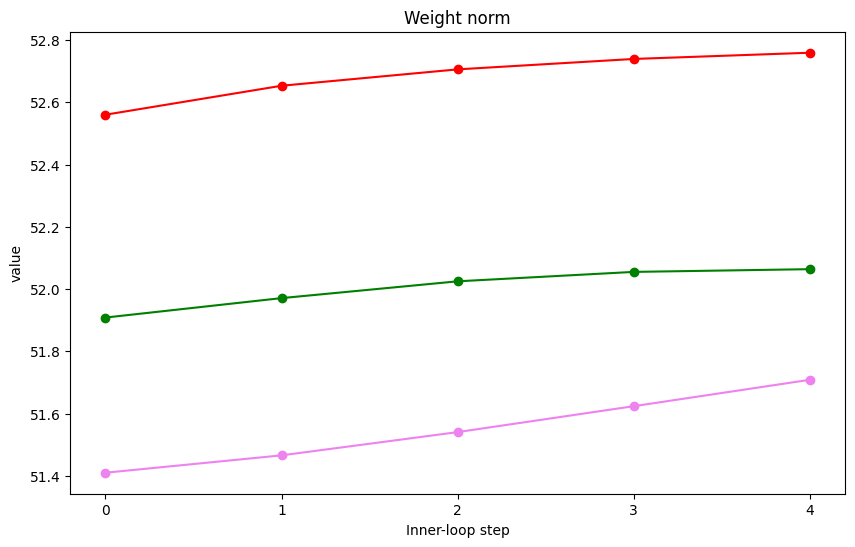

In [13]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['all_weights_norm'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['all_weights_norm'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['all_weights_norm'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['all_weights_norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
#plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')


plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

Text(0.5, 1.0, 'Gradient norm')

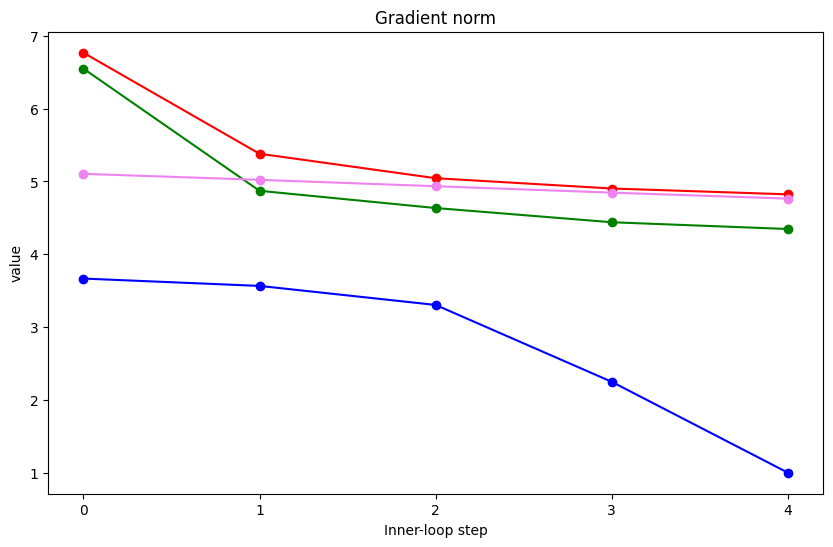

In [23]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

maml_mean_df = maml_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)
arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)
arbiter_withoutGN_means = np.log(arbiter_withoutGN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient norm')